# Company's Sales Data Analysis for 2019

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Monthly Sales Data

In [18]:
jan_df = pd.read_csv(r'sales_data/Sales_January_2019.csv')
feb_df = pd.read_csv(r'sales_data/Sales_February_2019.csv')
mar_df = pd.read_csv(r'sales_data/Sales_March_2019.csv')
apr_df = pd.read_csv(r'sales_data/Sales_April_2019.csv')
may_df = pd.read_csv(r'sales_data/Sales_May_2019.csv')
jun_df = pd.read_csv(r'sales_data/Sales_June_2019.csv')
jul_df = pd.read_csv(r'sales_data/Sales_July_2019.csv')
aug_df = pd.read_csv(r'sales_data/Sales_August_2019.csv')
sep_df = pd.read_csv(r'sales_data/Sales_September_2019.csv')
oct_df = pd.read_csv(r'sales_data/Sales_October_2019.csv')
nov_df = pd.read_csv(r'sales_data/Sales_November_2019.csv')
dec_df = pd.read_csv(r'sales_data/Sales_December_2019.csv')

## Joining, Exploring and Transforming the Data

In [19]:
all_df = pd.concat([jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df, aug_df, sep_df, oct_df, nov_df, dec_df])

In [20]:
all_df.shape

(186850, 6)

In [21]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [54]:
all_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month
25112,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12.0
25113,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12.0
25114,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12.0
25115,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12.0
25116,319670,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",99.99,12.0


In [22]:
for index, row in all_df.iterrows():
    try:
        float(row['Price Each'])
    except:
        try:
            all_df.drop(index, inplace=True)
        except:
            pass

In [23]:
all_df.shape

(183271, 6)

In [25]:
all_df['Price Each'] = pd.to_numeric(all_df['Price Each'])

In [26]:
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'])

In [27]:
all_df['Total Price'] = all_df['Quantity Ordered'] * all_df['Price Each']

In [28]:
all_df.shape

(183271, 7)

In [29]:
all_df['Total Price'].sum()

33879779.769999996

## Finding

The total sales for the year 2019 is $33_979_776.78  (Thirty three million, nine hundred and seventy nine thousand, seven hundred and seventy six dollar seventy eight cent)

In [31]:
all_df['Order Date'] = pd.to_datetime(all_df['Order Date'])

## Adding order month column

In [36]:
all_df['Order Month'] = all_df['Order Date'].dt.month

In [37]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1.0
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1.0
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1.0
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1.0
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1.0


In [38]:
all_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month
25112,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12.0
25113,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12.0
25114,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12.0
25115,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12.0
25116,319670,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",99.99,12.0


## Find the total number of sales for each month

In [56]:
monthly_sales = all_df.groupby('Order Month')['Total Price'].sum()
monthly_sales

Order Month
1.0     1786511.29
2.0     2158127.48
3.0     2755969.40
4.0     3336376.42
5.0     3101881.04
6.0     2524464.99
7.0     2587444.91
8.0     2191698.31
9.0     2050361.26
10.0    3679254.16
11.0    3149785.09
12.0    4557905.42
Name: Total Price, dtype: float64

## Visualizing the monthly sales

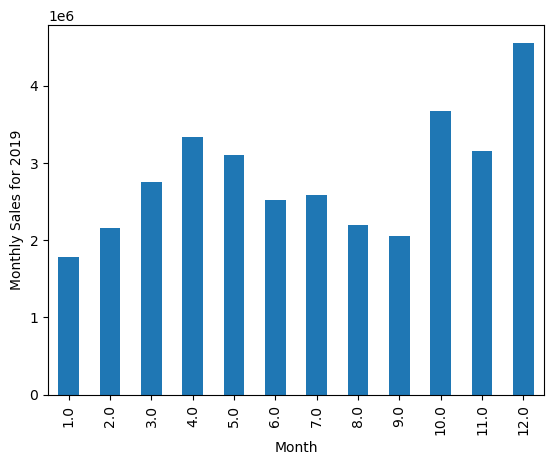

In [47]:
monthly_sales.plot(kind='bar', ylabel='Monthly Sales for 2019', xlabel='Month')
plt.show()

## Finding and visualizing the number of transactions for each month

In [57]:
monthly_trac = all_df.groupby('Order Month')['Total Price'].count()
monthly_trac

Order Month
1.0      9500
2.0     11726
3.0     14888
4.0     17984
5.0     16284
6.0     13292
7.0     14032
8.0     11719
9.0     11375
10.0    19973
11.0    17282
12.0    24680
Name: Total Price, dtype: int64

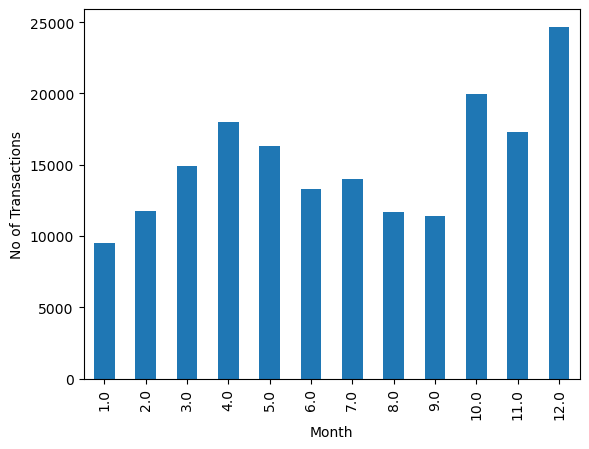

In [52]:
monthly_trac.plot(kind='bar', ylabel='No of Transactions', xlabel='Month')
plt.show()

## Findings

From the analysis, the peak sales occur in the month of December, October and April. Therefore the company ensure adequate stocking of products during these periond.